# Urban-Plumber2: AU-Pre site CLMU5 simulation


In [1]:
from pyclmuapp import usp_clmu
from pyclmuapp import get_urban_params
import matplotlib.pyplot as plt
import os
import xarray as xr
import numpy as np

In [2]:
%time
urban = get_urban_params(urban_ds='data/mksrf_urban_0.05x0.05_simyr2000.c170724.nc', # can be a xarray dataset or a path to a netcdf file
                 soil_ds='data/mksrf_soitex.10level.c010119.nc', # can be a xarray dataset or a path to a netcdf file
                 # here we use the default vancouverCAN dataset provided by CLM5.0 as template
                 template='data/surfdata.nc',
                 lat = -37.7306,
                 lon = 145.014,
                 PTC_URBAN=[0,0,100.0], # percentage of urban land use in each density class, sum should be 100 
                 # this means that the urban land use is 100% in the MD class
                 outputname='data/surfdata_AU_Pre.nc',)
urban # the created surfdata.nc file

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 µs
Found suitable point at lat: -37.7306, lon: 145.014
Found suitable point at lat: -37.7306, lon: 145.014


<xarray.Dataset>
Dimensions:                  (lsmlat: 1, lsmlon: 1, nlevsoi: 10, natpft: 15,
                              cft: 2, time: 12, lsmpft: 17, numurbl: 3,
                              numrad: 2, nglcecp1: 11, nglcec: 10, nlevurb: 10)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16
  * time                     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * lsmlat                   (lsmlat) int32 1
  * lsmlon                   (lsmlon) int32 1
  * numrad                   (numrad) int32 1 2
  * numurbl                  (numurbl) int32 1 2 3
  * nlevurb                  (nlevurb) int32 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: nlevsoi, lsmpft, nglcecp1, nglcec
Data variables: (12/77)
    mxsoil_color             int32 ...
    SOIL_COLOR               (lsmlat, lsmlon) int32 ...
    PCT_SAND                 (nlevsoi, lsmlat, lsmlon) float64 52.65 ... 39.92
    PCT_CLAY                 (nlevsoi, lsmlat, lsmlon) float64 16.22 ... 29.74
    ORGANIC                  (nlevsoi, lsmlat, lsmlon) float64 ...
    FMAX                     (lsmlat, lsmlon) float64 ...
    ...                       ...
    TK_IMPROAD               (nlevurb, numurbl, lsmlat, lsmlon) float32 1.9 ....
    TK_ROOF                  (nlevurb, numurbl, lsmlat, lsmlon) float32 1.15 ...
    TK_WALL                  (nlevurb, numurbl, lsmlat, lsmlon) float32 1.994...
    CV_IMPROAD               (nlevurb, numurbl, lsmlat, lsmlon) float32 2.1e+...
    CV_ROOF                  (nlevurb, numurbl, lsmlat, lsmlon) float32 1.957...
    CV_WALL                  (nlevurb, numurbl, lsmlat, lsmlon) float32 2.118...
Attributes: (12/52)
    Conventions:                          NCAR-CSM
    History_Log:                          created on: 02-14-19 10:18:01
    Logname:                              erik
    Host:                                 cheyenne3
    Source:                               Community Land Model: CLM5
    Version:                              release-clm5.0.18/gpfs/fs1/scratch/...
    ...                                   ...
    Fmax_raw_data_file_name:              mksrf_fmax_3x3min_USGS_c120911.nc
    Organic_matter_raw_data_file_name:    mksrf_organic_10level_5x5min_ISRIC-...
    zero_out_pft_override:                TRUE
    history:                              Thu Feb 14 10:18:15 2019: ncks -A -...
    history_of_appended_files:            Thu Feb 14 10:18:15 2019: Appended ...
    NCO:                                  netCDF Operators version 4.7.4 (htt...

## usp mode: user forcing mode

workflow

1. initialize

note: the docker container (named **myclmu**) should be running and bind the input_path, output_path, log_path and scripts_path. if not use the `usp.docker(cmd='run')` to start the container, this will help to bind above paths automatically.

2. check domian
   
3. check forcing
   must define the forcing file

4. run case

---

Using `ups_clmu()` will initiate the usp_clmu class. The class will take the following parameters:

- The inputfolder, outputfolder, logfolder, and scriptfolder will be checked in the current working directory.
- If the folder does not exist, it will be created.
- User can specify the folders by using the inputfolder, outputfolder, logfolder, and scriptfolder parameters.
- Inputfolder, outputfolder, logfolder, and scriptfolder parameters are optional.

make sure your `myclmu` container is running.

In [3]:
%%time
# initialize
usp = usp_clmu(
    pwd=os.getcwd(),
    container_type='docker')

# check surface
usp.check_surf(
    usr_surfdata="data/surfdata_AU_Pre.nc")
    #usr_surfdata="/Users/user/Documents/GitHub/pyclmuapp/inputfolder/Urban-PLUMBER/input_files/AU-Pre/surfdata_1x1_AU-Pre_detailed_simyr2000_c230710.nc")

# check the domain
# the domain file will be revised according to the surface data if usr_domain is not provided
# do this after check_surf
# because the surfdata should be provided to read the domain file
usp.check_domain()
# check the forcing
# this forcing derived from urban-plumber forcing data
usp.check_forcing(
    usr_forcing="/Users/user/Documents/GitHub/pyclmuapp/inputfolder/Urban-PLUMBER/datm_files/AU-Pre/CLM1PT_data/CTSM_DATM_AU-Pre_1993-2004.nc")

usp_pre = usp.run(
            output_prefix= "_clm.nc",
            case_name = "AU_Pre_default", 
            RUN_STARTDATE = "1993-01-01",
            STOP_OPTION = "nyears", 
            STOP_N = "12",
            iflog = True,
            logfile = "log.log",
            crun_type="usp-exec"#"case", when docker container is not start)
        )
usp_pre

Folder 'inputfolder' already exists.
Folder 'outputfolder' already exists.
Folder 'logfolder' already exists.
Folder 'scriptsfolder' already exists.
Folder '/Users/user/Documents/GitHub/pyclmuapp/inputfolder/usp' created successfully!
Copying the file CTSM_DATM_AU-Pre_1993-2004.nc to the /Users/user/Documents/GitHub/pyclmuapp/inputfolder/usp
CPU times: user 330 ms, sys: 76.4 ms, total: 406 ms
Wall time: 9min 11s


['/Users/user/Documents/GitHub/pyclmuapp/outputfolder/lnd/hist/AU_Pre_default_clm0_2024-05-30_11-24-15_clm.nc']

In [4]:
pre_nc = usp.nc_view(usp_pre[0]).sel(time=slice('2002-01-01', '2004-12-31'))

import the observation data

In [5]:
ds = xr.open_dataset('inputfolder/Urban-PLUMBER/datm_files/AU-Pre/CLM1PT_data/AU-Preston_clean_observations_v1.nc')
ds

<xarray.Dataset>
Dimensions:    (time: 22772)
Coordinates:
  * time       (time) datetime64[ns] 2003-08-12T03:30:00 ... 2004-11-28T13:00:00
Data variables: (12/28)
    SWdown     (time) float32 ...
    LWdown     (time) float32 ...
    Tair       (time) float32 ...
    Qair       (time) float32 ...
    PSurf      (time) float32 ...
    Rainf      (time) float32 ...
    ...         ...
    Wind_E_qc  (time) int8 ...
    SWup_qc    (time) int8 ...
    LWup_qc    (time) int8 ...
    Qle_qc     (time) int8 ...
    Qh_qc      (time) int8 ...
    Qtau_qc    (time) int8 ...
Attributes: (12/24)
    title:                      Flux tower observations from AU-Preston (afte...
    summary:                    Quality controlled flux tower observations fo...
    sitename:                   AU-Preston
    long_sitename:              Preston, Melbourne, Australia
    version:                    v1
    keywords:                   urban, flux tower, eddy covariance, observations
    ...                         ...
    observations_contact:       Andrew Coutts: andrew.coutts@monash.edu; Nige...
    observations_reference:     Coutts, Beringer and Tapper (2007a): https://...
    date_created:               2022-09-22 14:38:39
    source:                     https://github.com/matlipson/urban-plumber_pi...
    comment:                    -
    history:                    v0.9 (2021-09-08): beta issue; v1 (2022-09-15...

In [19]:
pre_nc['time'] = pre_nc['time'].dt.round('min')
pre_nc['time'] = pre_nc['time'] - np.timedelta64(1800, 's')
df = pre_nc[['Qle','Qh','Qtau','SWup','LWup']].to_dataframe()
df_ds = ds[['Qle','Qh','Qtau','SWup','LWup']].to_dataframe()
df['Qtau'] = -df['Qtau']
df = df.merge(df_ds, on='time', suffixes=('_usp', '_obs'))
df.index = df.index + np.timedelta64(10, 'h')
df.head(1)

,Qle_usp,Qh_usp,Qtau_usp,SWup_usp,LWup_usp,Qle_obs,Qh_obs,Qtau_obs,SWup_obs,LWup_obs
time,,,,,,,,,,
2003-08-12 13:30:00,10.910873,209.236023,1.421767,54.292088,423.377777,52.169998,124.519997,1.019,NaN,NaN


In [7]:
%%time
# modify the surface

# tree_area_fraction=0.225
# grass_area_fraction=0.15
# bare_soil_area_fraction=0.005
# water_area_fraction=0.0
# impervious_area_fraction=0.62
# roof fraction = 0.445
# raod fraction = 0.13
# topsoil_clay_fraction=0.18
# topsoil_sand_fraction=0.72
action = {
    #"ALB_ROOF_DIR": 0.109,
    #"ALB_ROOF_DIF": 0.109,
    "CANYON_HWR": 0.42,
    "HT_ROOF": 6.4,
    "WTLUNIT_ROOF": 0.445,
    "WTROAD_PERV": 1 - 0.13/(0.13+0.225+0.15+0.005),
    #"ALB_IMPROAD_DIR": 0.151,
    #"ALB_IMPROAD_DIF": 0.151,
    #"ALB_PERROAD_DIR": 0.151,
    #"ALB_PERROAD_DIF": 0.151,
    #"ALB_WALL_DIR": 0.21,
    #"ALB_WALL_DIF": 0.21,
    #"ALB_ROOF_DIR": 0.151,
    #"ALB_ROOF_DIF": 0.151,
}
usp.modify_surf(action=action, surfata_name="surface_modfied_AU_Pre.nc", mode="replace", urban_type=2)

with xr.open_dataset("inputfolder/usp/surface_modfied_AU_Pre.nc") as ds_surf:
    ds_surf['PCT_CLAY'].values = np.ones(ds_surf['PCT_CLAY'].shape)*0.18
    ds_surf['PCT_SAND'].values = np.ones(ds_surf['PCT_SAND'].shape)*0.72
    if os.path.exists("inputfolder/usp/surface_modfied_AU_Pre.nc"):
        os.remove("inputfolder/usp/surface_modfied_AU_Pre.nc")
    ds_surf.to_netcdf("inputfolder/usp/surface_modfied_AU_Pre.nc")

CPU times: user 238 ms, sys: 54.4 ms, total: 293 ms
Wall time: 348 ms


In [8]:
usp_pre_detail = usp.run(
            output_prefix= "_clm.nc",
            case_name = "AU_Pre_detail", 
            RUN_STARTDATE = "1993-01-01",
            STOP_OPTION = "nyears", 
            STOP_N = "12",
            RUN_TYPE= "coldstart",
            iflog = True,
            logfile = "log.log",
            crun_type="usp-exec"#"case", when docker container is not start)
        )
usp_pre_detail

The /Users/user/Documents/GitHub/pyclmuapp/inputfolder/usp/usp.sh already exists.


['/Users/user/Documents/GitHub/pyclmuapp/outputfolder/lnd/hist/AU_Pre_detail_clm0_2024-05-30_11-33-23_clm.nc']

In [16]:
pre_detail_nc = usp.nc_view(usp_pre_detail[0]).sel(time=slice('2002-01-01', '2004-12-31'))
pre_detail_nc['time'] = pre_detail_nc['time'].dt.round('min')
pre_detail_nc['time'] = pre_detail_nc['time'] - np.timedelta64(1800, 's')
#pre_detail_nc=xr.open_dataset('/Users/user/Documents/GitHub/pyclmuapp/inputfolder/Urban-PLUMBER/model_output/CLMU5_AU-Preston_detailed_v3.nc')#
#pre_detail_nc = xr.open_dataset('/Users/user/Documents/GitHub/pyclmuapp/outputfolder/lnd/hist/AU_Pre_detail_clm0_2024-05-28_15-17-48_clm.nc')
df_detail = pre_detail_nc[['Qle','Qh','Qtau','SWup','LWup']].to_dataframe()
df_ds = ds[['Qle','Qh','Qtau','SWup','LWup']].to_dataframe()
df_detail['Qtau'] = -df_detail['Qtau']
df_detail = df_detail.merge(df_ds, on='time', suffixes=('_usp', '_obs'))
df_detail.index = df_detail.index + np.timedelta64(10, 'h')
df_detail.head(1)

,Qle_usp,Qh_usp,Qtau_usp,SWup_usp,LWup_usp,Qle_obs,Qh_obs,Qtau_obs,SWup_obs,LWup_obs
time,,,,,,,,,,
2003-08-12 13:30:00,40.518375,163.207245,0.903549,45.892704,412.115601,52.169998,124.519997,1.019,NaN,NaN


In [50]:
var = 'SWup'
df_plot = df[[f'{var}_usp', f'{var}_obs']].dropna()
df_mean = df_plot[[f'{var}_usp', f'{var}_obs']].groupby(df_plot.index.hour).mean()
for h in range(0,24):
    if h not in df_mean.index:
        df_mean.loc[h] = [0,0]
df_mean

,SWup_usp,SWup_obs
time,,
5,5.192525,2.219045
6,15.860318,11.762077
7,26.457735,23.502831
8,39.209846,39.121555
9,54.963478,58.771595
10,66.912468,75.890755
11,74.084572,86.748314
12,74.373772,88.349739
13,70.800545,84.478455


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import warnings
from datetime import datetime
from scipy.stats import pearsonr

warnings.filterwarnings('ignore')
def plotting(df, save_path):
    var_list = ['SWup','LWup','Qle','Qh','Qtau']
    unit = ['$W/m^2$', '$W/m^2$', '$W/m^2$', '$W/m^2$', '$W/m^2$']
    fig = plt.figure(figsize=(12, 3))
    for var in var_list:
        ax = fig.add_subplot(2, 5, var_list.index(var)+1)

        df_plot = df[[f'{var}_usp', f'{var}_obs']].dropna()

        #ax.scatter(df_plot[f'{var}_usp'], df_plot[f'{var}_obs'], s=1)
        sns.histplot(
            x=f'{var}_usp',
            y=f'{var}_obs',
            data=df_plot,
            ax=ax,
            cmap='rainbow',
            bins=120,
        )
        mae = mean_absolute_error(df_plot[f'{var}_usp'], df_plot[f'{var}_obs'])
                            #mean_absolute_percentage_error(df_plot[f'{var}_usp'], df_plot[f'{var}_obs'])#mean_squared_error(df_plot[f'{var}_usp'], df_plot[f'{var}_obs'])
        R, _ = pearsonr(df_plot[f'{var}_usp'], df_plot[f'{var}_obs'])
        ax.set_title(f'{var} \nMAE: {mae:.2f}, R: {R:.2f}', fontsize=8, loc='left')
        ax.set_xlabel(f'Simulated {var} [{unit[var_list.index(var)]}]', fontsize=8)
        ax.set_ylabel(f'Observed {var} [{unit[var_list.index(var)]}]',  fontsize=8)
        print(f'{var} MAE: {mae:.2f}')

        df_mean = df_plot[[f'{var}_usp', f'{var}_obs']].groupby(df_plot.index.hour).mean()
        df_std = df_plot[[f'{var}_usp', f'{var}_obs']].groupby(df_plot.index.hour).std()
        ax = fig.add_subplot(2, 5, var_list.index(var)+6)
        
        if var == 'SWup':
            for h in range(0,24):
                if h not in df_mean.index:
                    df_mean.loc[h] = [0,0]
                    df_std.loc[h] = [0,0]
        df_mean = df_mean.sort_index()
        df_std = df_std.sort_index()
            
        
        ax.plot(df_mean.index, df_mean[f'{var}_usp'], color="#E02927", label='Simulated')
        ax.fill_between(df_mean.index, df_mean[f'{var}_usp']-df_std[f'{var}_usp'], df_mean[f'{var}_usp']+df_std[f'{var}_usp'], color="#E02927", alpha=0.2)
        ax.plot(df_mean.index, df_mean[f'{var}_obs'], color="#3964DF", label='Observed')
        ax.fill_between(df_mean.index, df_mean[f'{var}_obs']-df_std[f'{var}_obs'], df_mean[f'{var}_obs']+df_std[f'{var}_obs'], color="#3964DF", alpha=0.2)
        ax.set_ylabel(f'{var} [{unit[var_list.index(var)]}]', fontsize=8)
        ax.set_xlabel('Local Hour', fontsize=8)
        ax.set_title('')
    
    handles, labels = plt.gca().get_legend_handles_labels()

    desired_handles = [h for h, l in zip(handles, labels) if l in ['Simulated', 'Observed']]
    desired_labels = [l for l in labels if l in ['Simulated', 'Observed']]

    fig.legend(desired_handles, desired_labels, loc='lower center', ncol=2, fontsize=8, frameon=False)
    #fig.legend([l1, l2], ['Simulated', 'Observed'], loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

SWup MAE: 12.78
LWup MAE: 19.90
Qle MAE: 33.42
Qh MAE: 39.17
Qtau MAE: 0.15


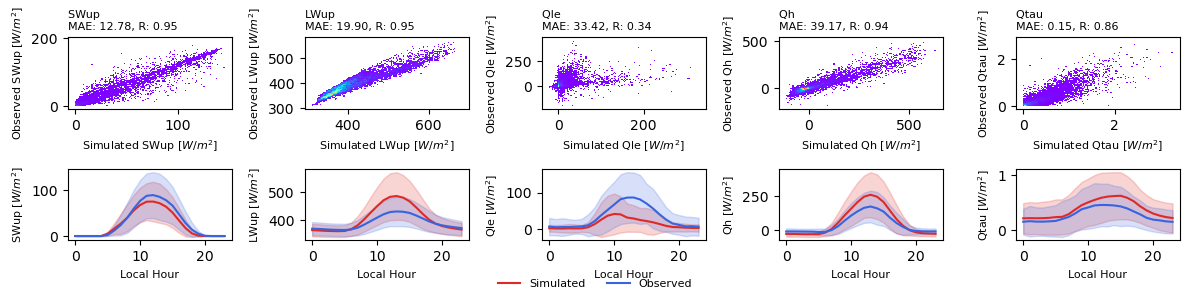

SWup MAE: 16.17
LWup MAE: 13.83
Qle MAE: 25.55
Qh MAE: 25.75
Qtau MAE: 0.11


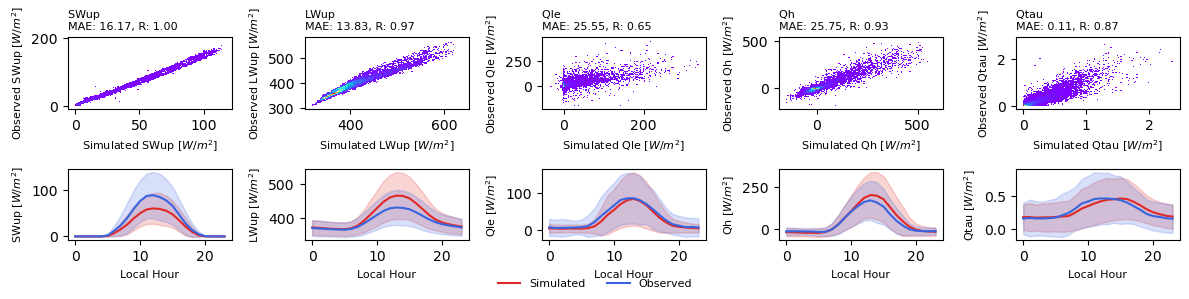

In [52]:
plotting(df, 'figs/CLMU5_AU-Pre_default.pdf')
plotting(df_detail, 'figs/CLMU5_AU-Pre_detail.pdf')